In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, make_scorer,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
feature_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target_label = 'quality'

In [6]:
correlation_matrix = data[feature_list].corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


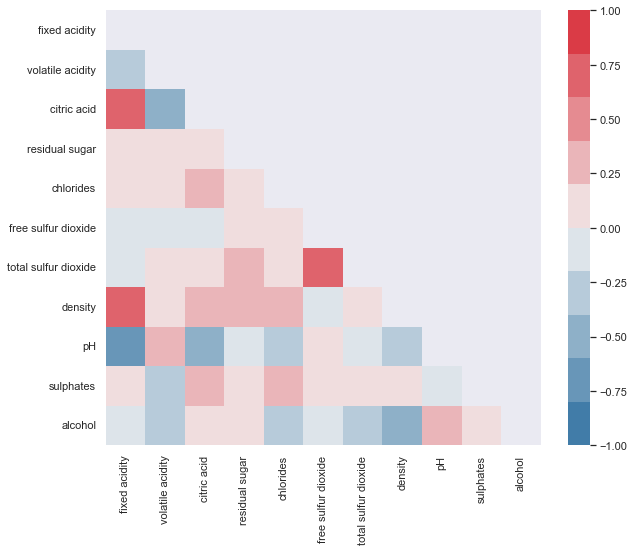

In [7]:
sns.set(rc={'figure.figsize':(10,8)})
color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(correlation_matrix), k=0)
sns.heatmap(correlation_matrix,vmin=-1.,vmax=1.,cmap=color_map,mask=mask,square=True)
pass

In [8]:
for i in feature_list:
    print(data[i].describe())

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chloride

Decision tree

In [9]:
Y = data[target_label]
X = data[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

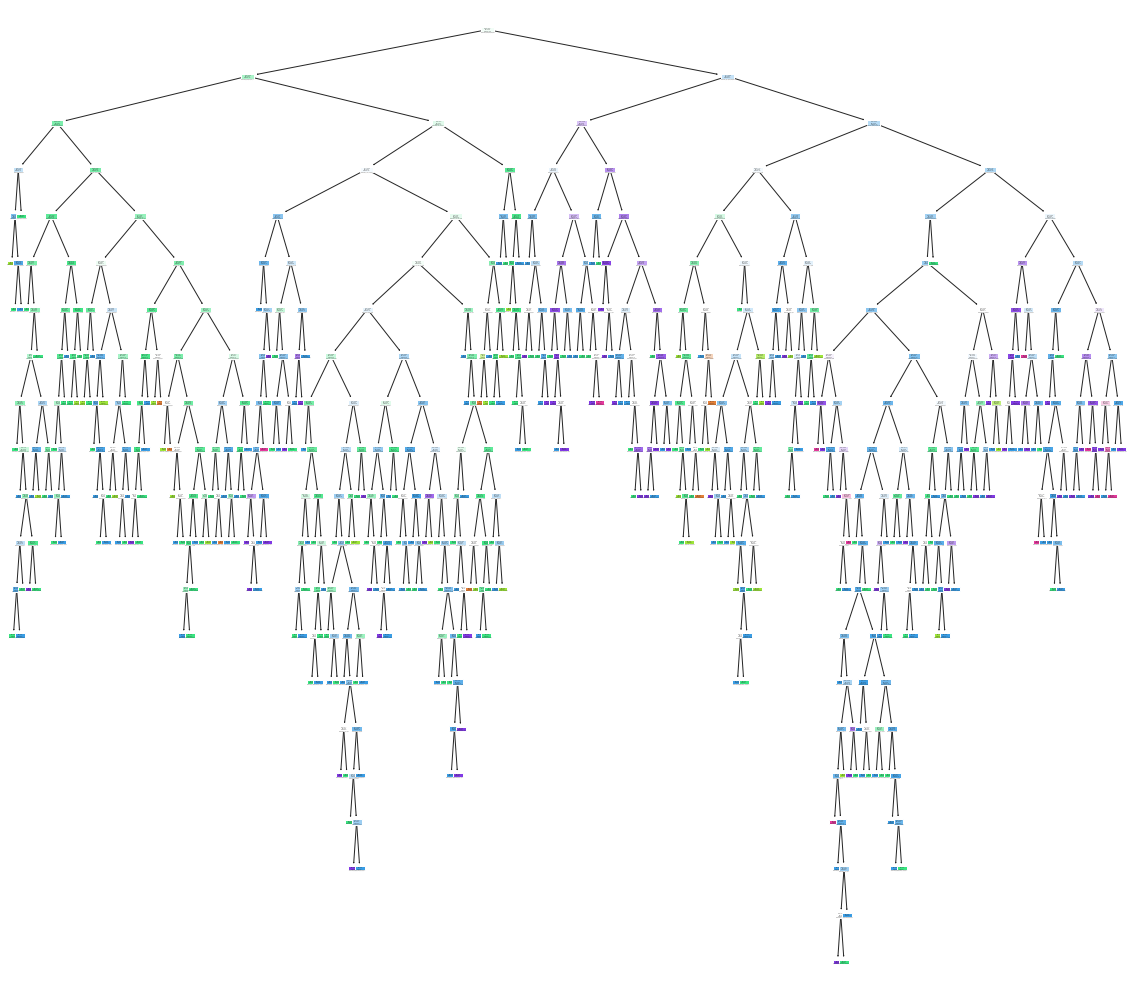

In [20]:
tree_data = DecisionTreeClassifier(random_state=0)
tree_data.fit(X_train, y_train)

plt.figure(figsize = (20, 18))

plot_tree(tree_data,
          # feature_names = tree_data.feature_list,
          # class_names = tree_data.target_label,
          filled=True);

In [22]:
tree_data.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [28]:
param_grid = {"ccp_alpha" : [0, 0.2, 0.02],
    "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90], 
           "min_samples_split":[3,5,7,9,11,13,15,17,20]}
print(param_grid)



{'ccp_alpha': [0, 0.2, 0.02], 'splitter': ['best', 'random'], 'max_depth': [1, 3, 5, 7, 9, 11, 12], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90], 'min_samples_split': [3, 5, 7, 9, 11, 13, 15, 17, 20]}


In [48]:
random_search = RandomizedSearchCV(tree_data,
                                   param_distributions=param_grid,
                                   cv=5,
                                   n_iter=250,
                                   verbose=1, 
#                                   scoring=make_scorer(f1_score , average='macro'),
                                   random_state=99)
random_search.fit(X, Y)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=250,
                   param_distributions={'ccp_alpha': [0, 0.2, 0.02],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                   

In [51]:

random_search.best_params_


{'splitter': 'best',
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 17,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 90,
 'max_features': None,
 'max_depth': 5,
 'ccp_alpha': 0}

In [52]:
param_grid2 = {
    
            "max_depth" : [5,11,12],
           "min_samples_leaf":[10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2],
           "max_leaf_nodes":[None, 90], 
           "min_samples_split":[17,20]}
print(param_grid2)

{'max_depth': [5, 11, 12], 'min_samples_leaf': [10], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2], 'max_leaf_nodes': [None, 90], 'min_samples_split': [17, 20]}


In [53]:
grid_search = GridSearchCV(tree_data, param_grid=param_grid2, cv=5, verbose=0)
grid_search.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 11, 12], 'max_leaf_nodes': [None, 90],
                         'min_samples_leaf': [10],
                         'min_samples_split': [17, 20],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2]})

In [54]:
best_param_no = grid_search.best_index_ 
print('Best params set:', grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Best params score:', grid_search.best_score_ )

Best params set: {'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 17, 'min_weight_fraction_leaf': 0.1} (no. 1)
Best params score: 0.5509894200626959


In [58]:
tree_data_opt = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = None, min_samples_leaf=10, min_samples_split=17, min_weight_fraction_leaf=0.1)
tree_data_opt.fit(X_train, y_train)

# Dokonujemy predykcji dla danych testowych.
y_pred_tree = tree_data_opt.predict(X_test)

# Obliczamy dokładność dla danych testowych
score = accuracy_score(y_test,y_pred_tree)

print('Accuracy (Decision Tree):',score)
print('Wynik na zbiorze testowym: ', tree_data_opt.score(X_test, y_test))
print(classification_report(y_test, y_pred_tree))

Accuracy (Decision Tree): 0.55625
Wynik na zbiorze testowym:  0.55625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.57      0.63       135
           6       0.55      0.61      0.58       142
           7       0.26      0.52      0.35        27
           8       0.00      0.00      0.00         3

    accuracy                           0.56       320
   macro avg       0.25      0.28      0.26       320
weighted avg       0.57      0.56      0.55       320



C:\Users\doria\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doria\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doria\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest

In [81]:
forest_data = RandomForestClassifier()
forest_data.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
param_grid3 = {"n_estimators": [10, 17, 25, 33, 41, 48, 56, 64, 72, 80,100,200],
    "ccp_alpha" : [0, 0.2, 0.02],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90], 
           "min_samples_split":[3,5,7,9,11,13,15,17,20],
           "bootstrap": [True,False]}
print(param_grid3)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80, 100, 200], 'ccp_alpha': [0, 0.2, 0.02], 'max_depth': [1, 3, 5, 7, 9, 11, 12], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90], 'min_samples_split': [3, 5, 7, 9, 11, 13, 15, 17, 20], 'bootstrap': [True, False]}


In [86]:
random_search2 = RandomizedSearchCV(forest_data,
                                   param_distributions=param_grid3,
                                   cv=5,
                                   n_iter=500,
                                   verbose=1)
random_search2.fit(X, Y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=500,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0, 0.2, 0.02],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [3, 5, 7, 9, 11,
                                                              13, 15, 17, 20],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                

In [88]:
random_search2.best_params_

{'n_estimators': 100,
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_leaf_nodes': 70,
 'max_features': 'auto',
 'max_depth': 11,
 'ccp_alpha': 0,
 'bootstrap': True}

In [93]:
param_grid4 = {"n_estimators": [100,200],
            "max_depth" : [11,20],
           "min_samples_leaf":[7,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2],
           "max_leaf_nodes":[None,70,80,90], 
           "min_samples_split":[9,20]}
print(param_grid4)

{'n_estimators': [100, 200], 'max_depth': [11, 20], 'min_samples_leaf': [7, 10], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2], 'max_leaf_nodes': [None, 70, 80, 90], 'min_samples_split': [9, 20]}


In [95]:
grid_search2 = GridSearchCV(forest_data, param_grid=param_grid4, cv=5, verbose=0)
grid_search2.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [11, 20],
                         'max_leaf_nodes': [None, 70, 80, 90],
                         'min_samples_leaf': [7, 10],
                         'min_samples_split': [9, 20],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'n_estimators': [100, 200]})

In [96]:
best_param_no2 = grid_search2.best_index_ 
print('Best params set:', grid_search2.best_params_, '(no. {0})'.format(best_param_no2))
print('Best params score:', grid_search2.best_score_ )

Best params set: {'max_depth': 11, 'max_leaf_nodes': None, 'min_samples_leaf': 7, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100} (no. 6)
Best params score: 0.5953840125391849


In [101]:
grid_search2.cv_results_

{'mean_fit_time': array([0.21647134, 0.41357665, 0.13993382, 0.27813954, 0.12597828,
        0.27002959, 0.21324677, 0.54445252, 0.21452451, 0.31949201,
        0.15451303, 0.35515156, 0.27320461, 0.44497857, 0.16874895,
        0.36940365, 0.15410056, 0.26523638, 0.21425929, 0.48722072,
        0.1966783 , 0.48704352, 0.1667954 , 0.27097406, 0.21082387,
        0.42781286, 0.14801412, 0.33684711, 0.201161  , 0.30621662,
        0.22372594, 0.51504898, 0.14630508, 0.33197541, 0.14554086,
        0.38738613, 0.3330554 , 0.47512956, 0.14679532, 0.31335669,
        0.12908607, 0.25859528, 0.20838652, 0.40838289, 0.15888424,
        0.32702065, 0.4186305 , 0.31143413, 0.23017964, 0.45602565,
        0.15330977, 0.30861468, 0.12995033, 0.26992726, 0.21090517,
        0.53393359, 0.1765974 , 0.30959654, 0.18194237, 0.35090537,
        0.20612659, 0.4955152 , 0.21584244, 0.41747642, 0.15230079,
        0.29173913, 0.20903921, 0.42481441, 0.15706959, 0.33001099,
        0.19966164, 0.31166706,

In [99]:
forest_data_opt = RandomForestClassifier(max_depth = 11, max_leaf_nodes = None, min_samples_leaf=7, min_samples_split=20, min_weight_fraction_leaf=0.0, n_estimators=100)
forest_data_opt.fit(X_train, y_train)

# Dokonujemy predykcji dla danych testowych.
y_pred_forest = forest_data_opt.predict(X_test)

# Obliczamy dokładność dla danych testowych
score2 = accuracy_score(y_test,y_pred_forest)

print('Accuracy (Random Forest):',score2)
print('Wynik na zbiorze testowym: ', forest_data_opt.score(X_test, y_test))
print(classification_report(y_test, y_pred_forest))

Accuracy (Random Forest): 0.684375
Wynik na zbiorze testowym:  0.684375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.79      0.75       135
           6       0.68      0.70      0.69       142
           7       0.52      0.48      0.50        27
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.65      0.68      0.67       320



C:\Users\doria\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doria\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doria\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
